In [1]:
from __future__ import division
import inspect
from sympy.interactive.printing import init_printing
# init_printing(use_unicode=False, wrap_line=False, use_latex="mathjax")

init_printing(use_unicode=False, wrap_line=False)
# from sympy.interactive import init_session
# init_session() 
from sympy.matrices import Matrix, eye, zeros, diag
from sympy import symbols, diff
import sympy as sp
import numpy as np

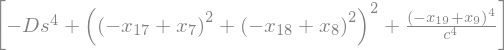

In [43]:
def norm2(_x):
    return sp.sqrt(_x.T @ _x)

c = sp.symbols('c', real=True)
Ds = Matrix([sp.symbols('Ds')], real=True)

e7 = Matrix([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
e8 = Matrix([0, 0, 0, 0, 0, 0, 0,  0, 1, 0])
e9 = Matrix([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
Exy = Matrix([e7.T, e8.T])
Ez = e9.T
def h(eij):
    return norm2(Exy @ (eij)) ** 4 + ((Ez / c) @ (eij)) ** 4 - Ds ** 4

eij = Matrix(sp.symbols('e:10'))
x1 = Matrix(sp.symbols('x:10'))
x2 = Matrix(sp.symbols('x10:20'))
x = x1.col_join(x2)
xhij = h(x1 - x2)
hij = h(eij)
xhij

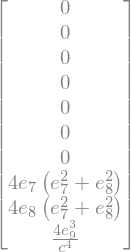

In [44]:
dhde = Matrix([diff(hij, e) for e in eij])
dhde

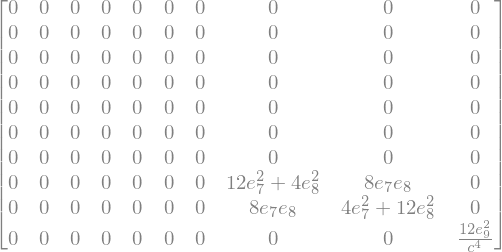

In [45]:
dhde2 = Matrix([diff(dhde, e).T for e in eij])
dhde2

(100, 10)


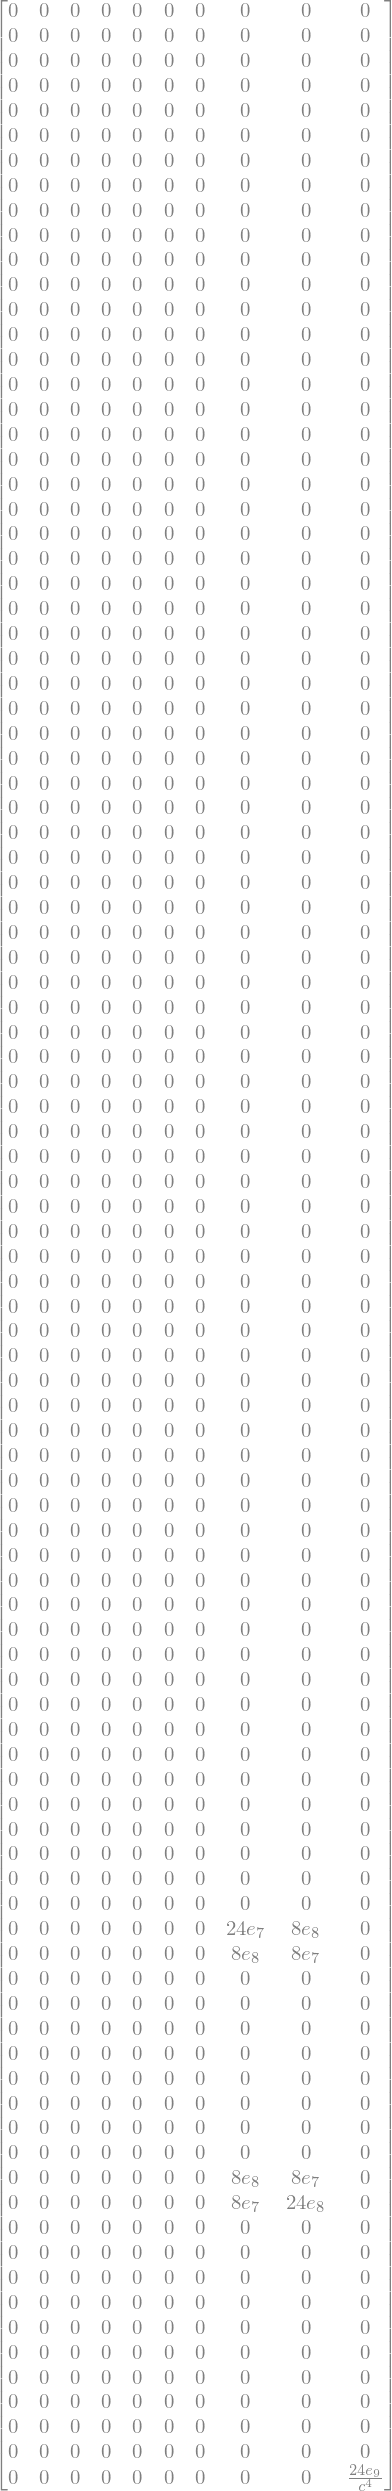

In [46]:
dhde3 = sp.Matrix([diff(dhde2, e) for e in eij])
print(dhde3.shape)
dhde3[:, :]

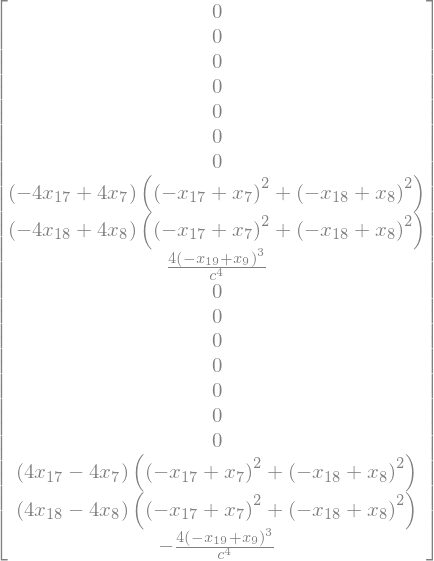

In [47]:
dhdx = Matrix([diff(xhij, xs) for xs in x])
dhdx

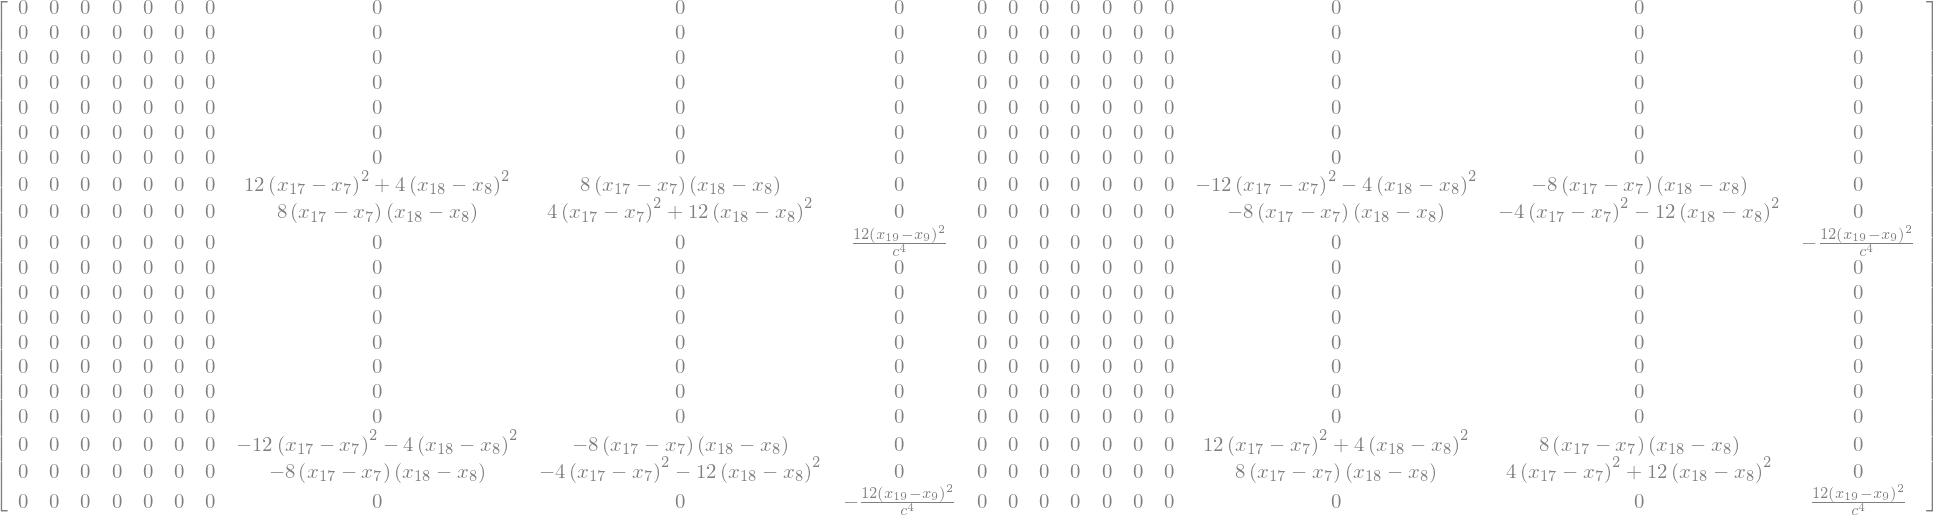

In [73]:
dhdx2 = Matrix([diff(dhdx, xs).T for xs in x])
dhdx2.simplify()
dhdx2.shape
dhdx2

(20, 20)


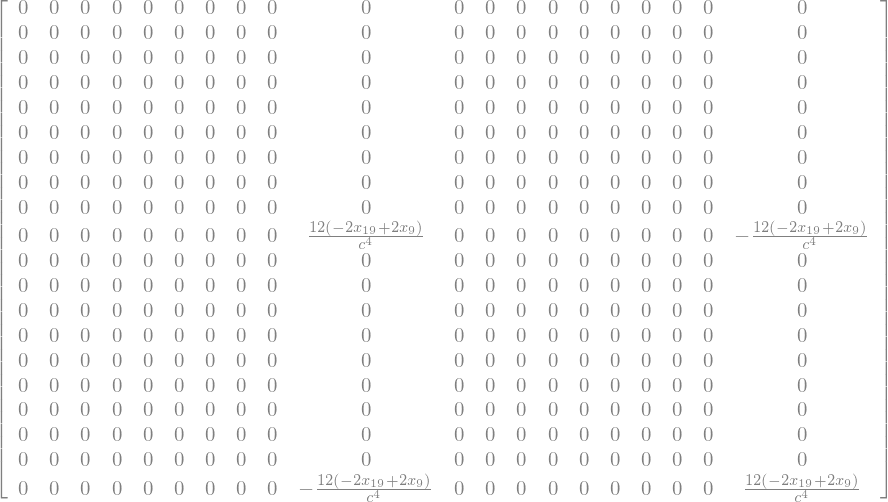

In [74]:
dhdx3 = [diff(dhdx2, xs) for xs in x]
print(dhdx3[0].shape)
dhdx3[9][:, :]